# Data Mining Assignment 2_DT_NB

## Student Details

Student Name and ID of the member submitting the assignment: MEGHANA RAMIDI(1002036880),SWATHI SHANAM(1002023662)

Student Name and ID of the remaining members: MANIKANTA BHAVANAM(1002039918)

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
**10 points per question will be deducted incase you fail to do so**
<br>**DO NOT DELETE THIS CELL**<br>
#### Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

In [29]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# plot confusion matrix and the classification report techniques used to evaluate a classification model and 
# accuracy_score which is used for checking the fraction of samples predicted correctly.
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report
# Visualize and plotting tree from sklearn
from sklearn import tree 

#For visualization. Matplotlib for basic Visualization and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

#importing GaussianNB for implementing the Gaussian Naive Bayes algorithm for classification
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.feature_extraction.text import CountVectorizer

## Programming Assignment Details (5 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Gender_Classifier.csv .Output/prediction variable is 'gender' [1 points]

2) Create a dataframe and print the first and last seven records of your dataset.  [1 points]

3) Print the class labels. [1 points]

4) Split your dataset 60% for training, 20 for validation and 20% for testing the classifier. Use random state as 2022 [2 points]

In [30]:
#1) Load Gender dataset from Gender_Classifier.csv
pd.read_csv('Gender_Classifier.csv', encoding='latin1', delimiter = ",")

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/2015 23:24,male,1.0000,yes,1.0,12/5/2013 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/2015 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/2015 23:30,male,1.0000,yes,1.0,10/1/2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/2015 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/2015 23:33,male,0.6625,yes,1.0,11/28/2014 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/2015 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/2015 23:10,male,1.0000,yes,1.0,6/11/2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/2015 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/2015 1:15,female,1.0000,yes,1.0,4/16/2014 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/2015 12:40,6.590000e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/2015 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/2015 13:20,6.590000e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/2012 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/2015 12:40,6.590000e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/2012 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/2015 13:20,6.590000e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/2012 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/2015 12:40,6.590000e+17,Texas Hill Country,NaN


In [31]:
#2) Create a dataframe and print the first seven records of your dataset. 
df_gclass=pd.read_csv('Gender_Classifier.csv', encoding='latin1', delimiter = ",")
df_gclass.head(7)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/2015 23:24,male,1.0000,yes,1.0,12/5/2013 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/2015 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/2015 23:30,male,1.0000,yes,1.0,10/1/2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/2015 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/2015 23:33,male,0.6625,yes,1.0,11/28/2014 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/2015 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/2015 23:10,male,1.0000,yes,1.0,6/11/2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/2015 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/2015 1:15,female,1.0000,yes,1.0,4/16/2014 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/2015 12:40,6.590000e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/2015 1:47,female,1.0000,yes,1.0,3/11/2010 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/2015 12:40,6.590000e+17,New York Gritty,Central Time (US & Canada)
6,815719232,False,finalized,3,10/27/2015 1:57,brand,1.0000,yes,1.0,4/24/2008 13:03,...,https://pbs.twimg.com/profile_images/528547133...,0,0,@BpackEngineer Thank you for your patience whi...,NaN,13354,10/26/2015 12:40,6.590000e+17,Worldwide,Eastern Time (US & Canada)


In [32]:
#Print last seven records of your dataset.
df_gclass.tail(7)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
20043,815756700,True,golden,240,NaN,male,1.0000,yes,1.0,9/27/2011 0:19,...,https://pbs.twimg.com/profile_images/378800000...,1,5ED4DC,"Game faggot and venison loin, crisp spelt and ...",NaN,8193,10/26/2015 13:19,6.590000e+17,Chertsey Bridge,NaN
20044,815756767,True,golden,227,NaN,female,1.0000,yes,1.0,6/11/2014 1:55,...,https://pbs.twimg.com/profile_images/643483977...,0,C0DEED,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,NaN,6669,10/26/2015 13:19,6.590000e+17,NaN,NaN
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/2015 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/2015 13:20,6.590000e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/2012 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/2015 12:40,6.590000e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/2012 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/2015 13:20,6.590000e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/2012 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/2015 12:40,6.590000e+17,Texas Hill Country,NaN
20049,815757985,True,golden,249,NaN,female,1.0000,yes,1.0,4/14/2014 17:22,...,https://pbs.twimg.com/profile_images/655134724...,0,C0DEED,I think for my APUSH creative project I'm goin...,NaN,2922,10/26/2015 13:19,6.590000e+17,NaN,NaN


In [33]:
#3) Print the class labels.
print("the class lables are:")
df_gclass.columns

the class lables are:


Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [34]:
dict_columns_type = {'_unit_id': float,'_golden': float,'_trusted_judgments': float,'fav_number': float,'retweet_count': float,'tweet_count': float}   
df_gclass = df_gclass.astype(dict_columns_type)

In [35]:
#4) Split your dataset 60% for training, 20 for validation and 20% for testing the classifier. Use random state as 2022

df_gclass=df_gclass[['gender','fav_number','profile_yn:confidence','_trusted_judgments','_unit_id','retweet_count','tweet_count']] 
x_gdata = df_gclass.drop(labels="gender",axis=1) #selecting features for predecting gender classification.
y_gdata = df_gclass.gender #storing gender column in y_data_heart

# splitting the dataset 60% for training and 40% for testing&validation for the classifier.
train_x_gdata, rem_x_gdata, train_y_gdata, rem_y_gdata = train_test_split(x_gdata,y_gdata, train_size=0.6, random_state = 2022)
# splitting the remainig 40% data to obtain testing and validation data
test_x_gdata, validate_x_gdata, test_y_gdata, validate_y_gdata = train_test_split(rem_x_gdata,rem_y_gdata,test_size=0.5, random_state = 2022)

# Naive Bayes (10 Points)

1) Use all types of Naive bayes classifier present in the sklearn to predict the test data. If you are not able to implement any of the classifier explain in detail why it can't be done.[5 point] 

2) Use comments to explain your code and variable names[1 point]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support)for all the NB Classifier. show the best classifier. Explain the classification report in your own words. Do not copy from the internet. [4 points]

In [36]:
# 1)Use all types of Naive bayes classifier present in the sklearn to predict the test data. If you are not able to implement any of the classifier explain in detail why it can't be don


# creating the model for Naive bayes classifier (Multinomial)
multi_nvb = MultinomialNB()

#training the model for Naive bayes classifier (Multinomial)
multi_nvb.fit(train_x_gdata, train_y_gdata) 

# predicting the test data for Naive bayes classifier (Multinomial)
predict_multi_nvb = multi_nvb.predict(test_x_gdata) 


The Confusion Matrix for Naive bayes classifier (Multinomial) model is:


/Users/meghanareddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


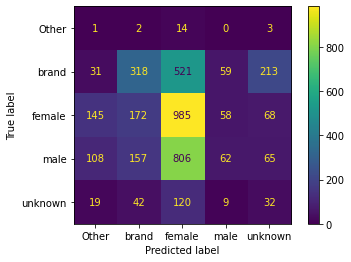

In [37]:
#calculating confusion matrix on Naive bayes classifier (Multinomial) model and provide the graphics data using plot_confusion_matrix by importing sklearn.metrics
print("The Confusion Matrix for Naive bayes classifier (Multinomial) model is:")
#values_format='' provide a standard way to display the numbers in '.2g' format which is the default for the plot function.
plot_confusion_matrix(multi_nvb, test_x_gdata, test_y_gdata, values_format = '')

In [38]:
#calculating and printing classification Report on Naive bayes classifier (Multinomial) model which includes precision, recall, f1-score, and support.
print("The classification report for Naive bayes classifier (Multinomial) model is:")

classification_report(test_y_gdata, predict_multi_nvb, output_dict=True) #using output_dict=True for formatting output.

The classification report for Naive bayes classifier (Multinomial) model is:


{'Other': {'precision': 0.003289473684210526,
  'recall': 0.05,
  'f1-score': 0.006172839506172839,
  'support': 20},
 'brand': {'precision': 0.4602026049204052,
  'recall': 0.27845884413309985,
  'f1-score': 0.3469721767594108,
  'support': 1142},
 'female': {'precision': 0.4026982829108749,
  'recall': 0.6897759103641457,
  'f1-score': 0.5085183273102736,
  'support': 1428},
 'male': {'precision': 0.32978723404255317,
  'recall': 0.05175292153589316,
  'f1-score': 0.08946608946608947,
  'support': 1198},
 'unknown': {'precision': 0.08398950131233596,
  'recall': 0.14414414414414414,
  'f1-score': 0.10613598673300166,
  'support': 222},
 'accuracy': 0.3486284289276808,
 'macro avg': {'precision': 0.25599341937407594,
  'recall': 0.24282636403545657,
  'f1-score': 0.21145308395498966,
  'support': 4010},
 'weighted avg': {'precision': 0.3776561316618039,
  'recall': 0.3486284289276808,
  'f1-score': 0.3125367626642252,
  'support': 4010}}

In [39]:
# creating the model for Naive bayes classifier (Gaussian)
gauss_nb = GaussianNB()

#training the model for Naive bayes classifier (Gaussian)
gauss_nb.fit(train_x_gdata, train_y_gdata) 

# predicting the test data for Naive bayes classifier (Gaussian)
predict_gauss_nb = multi_nvb.predict(test_x_gdata) 

The Confusion Matrix for Naive bayes classifier (Gaussian) model is:


/Users/meghanareddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


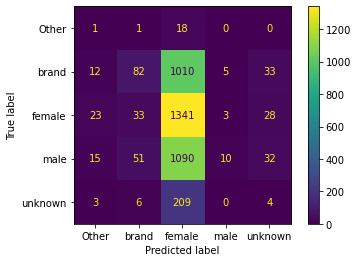

In [40]:
#calculating confusion matrix on Naive bayes classifier (Gaussian) model and provide the graphics data using plot_confusion_matrix by importing sklearn.metrics
print("The Confusion Matrix for Naive bayes classifier (Gaussian) model is:")
#values_format='' provide a standard way to display the numbers in '.2g' format which is the default for the plot function.
plot_confusion_matrix(gauss_nb, test_x_gdata, test_y_gdata, values_format = '')

In [41]:
#calculating and printing classification Report on Naive bayes classifier (Gaussian) model which includes precision, recall, f1-score, and support.
print("The classification report for Naive bayes classifier (Gaussian) model is:")

classification_report(test_y_gdata, predict_gauss_nb, output_dict=True) #using output_dict=True for formatting output.

The classification report for Naive bayes classifier (Gaussian) model is:


{'Other': {'precision': 0.003289473684210526,
  'recall': 0.05,
  'f1-score': 0.006172839506172839,
  'support': 20},
 'brand': {'precision': 0.4602026049204052,
  'recall': 0.27845884413309985,
  'f1-score': 0.3469721767594108,
  'support': 1142},
 'female': {'precision': 0.4026982829108749,
  'recall': 0.6897759103641457,
  'f1-score': 0.5085183273102736,
  'support': 1428},
 'male': {'precision': 0.32978723404255317,
  'recall': 0.05175292153589316,
  'f1-score': 0.08946608946608947,
  'support': 1198},
 'unknown': {'precision': 0.08398950131233596,
  'recall': 0.14414414414414414,
  'f1-score': 0.10613598673300166,
  'support': 222},
 'accuracy': 0.3486284289276808,
 'macro avg': {'precision': 0.25599341937407594,
  'recall': 0.24282636403545657,
  'f1-score': 0.21145308395498966,
  'support': 4010},
 'weighted avg': {'precision': 0.3776561316618039,
  'recall': 0.3486284289276808,
  'f1-score': 0.3125367626642252,
  'support': 4010}}

## Report (23 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier in details in your own words. Dont copy paste it from the internet. Write it on your own.  [5 points]

2) Describe the datasets like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [6 points]

4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy [4 points]

6) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!

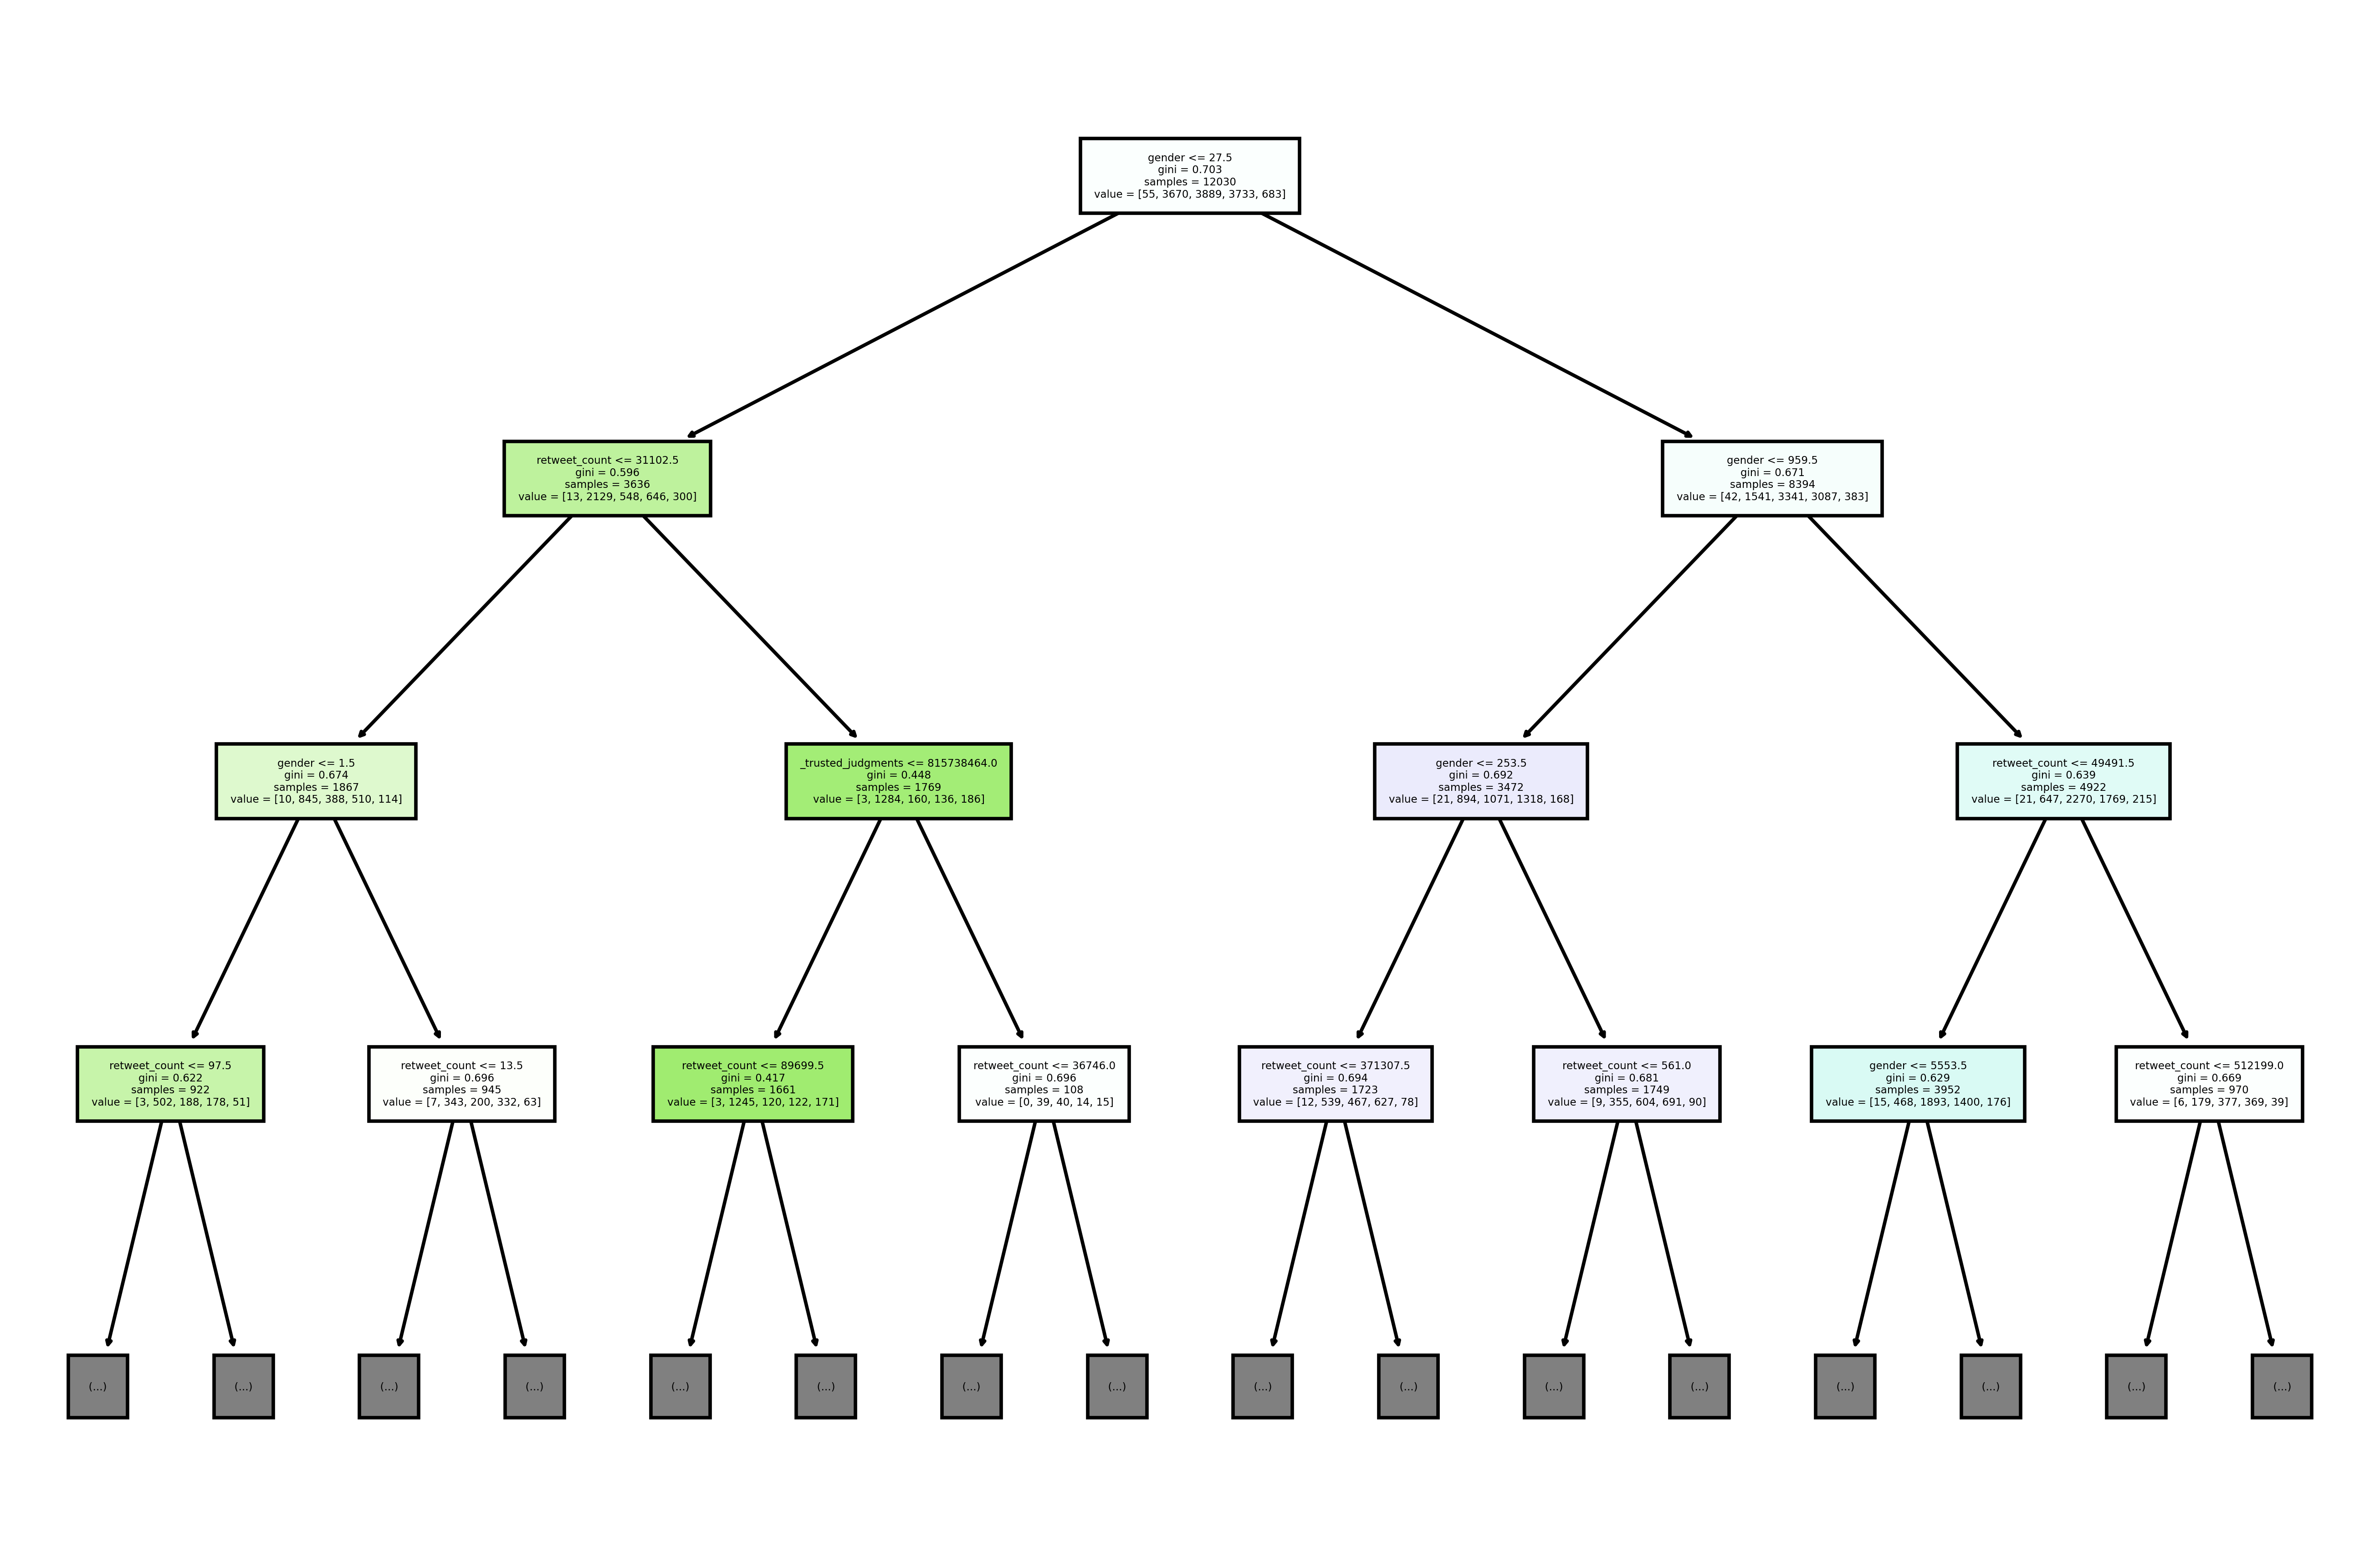

In [42]:

#4)Gini Decision tree
#providing figure by Figure size (figsize) which determines the size of the figure in inches
#Dots per inches (dpi) determines how many pixels the figure comprises and also determine readability format.
fig, axes = plt.subplots(figsize = (12,8), dpi=550)   

#tree.plot_tree determining how tree will be plotted using different features
#feature_names: Names of each of the features.
#max_depth: The maximum depth of the representation
#filled: purity of node for multi-output.
#fontsize:Size of text font.
tree.plot_tree(gini_classifi_model, max_depth = 3,feature_names = ['gender','fav_number','profile_yn:confidence','_trusted_judgments','_unit_id','retweet_count','tweet_count'], filled = True, fontsize=3)


#savefig() method is used to save the figure in the local machine.
fig.savefig('gini_decision_tree_depth.png') 

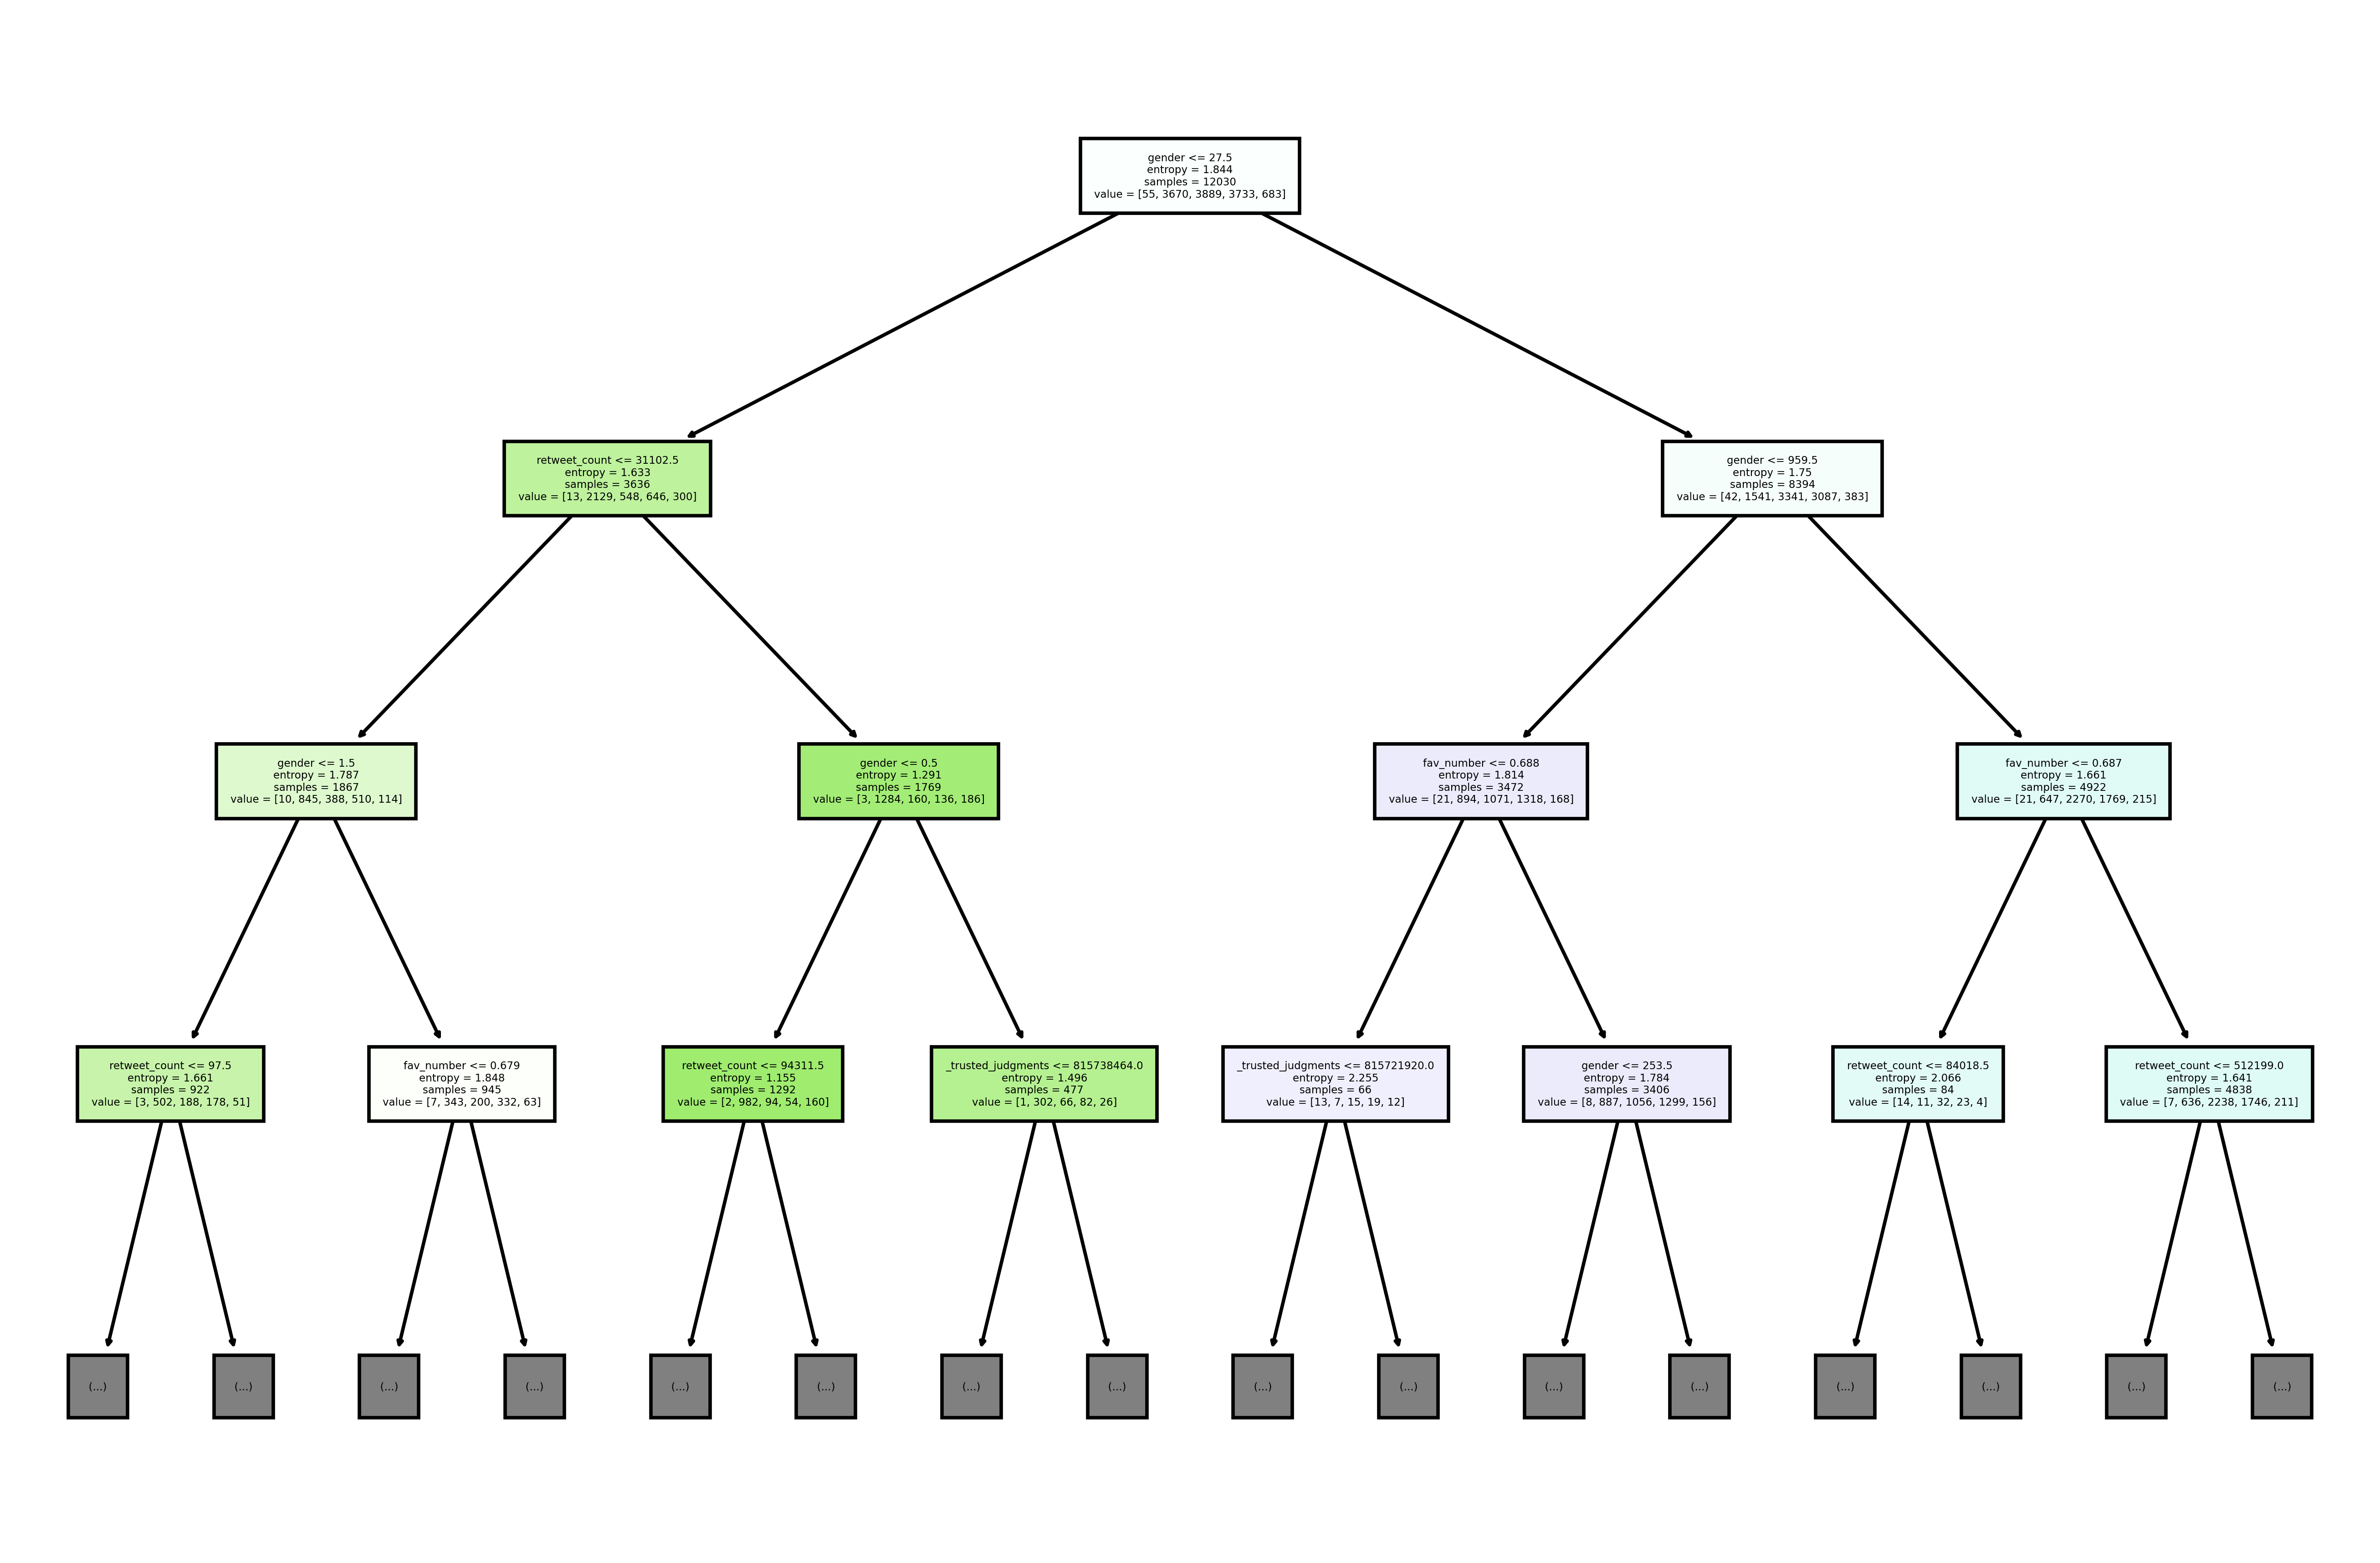

In [43]:
#4)entropy Decision tree
#providing figure by Figure size (figsize) which determines the size of the figure in inches
#Dots per inches (dpi) determines how many pixels the figure comprises and also determine readability format.
fig, axes = plt.subplots(figsize = (12,8), dpi=550)   

#tree.plot_tree determining how tree will be plotted using different features
#feature_names: Names of each of the features.
#max_depth: The maximum depth of the representation
#filled: purity of node for multi-output.
#fontsize:Size of text font.
tree.plot_tree(entropy_classifi_model, max_depth = 3,feature_names = ['gender','fav_number','profile_yn:confidence','_trusted_judgments','_unit_id','retweet_count','tweet_count'], filled = True, fontsize=3)


#savefig() method is used to save the figure in the local machine.
fig.savefig('entropy_decision_tree_depth.png')    

In [44]:
#5)entropy
#creating model by providing criterion "entropy".

entropy_classifi_model = DecisionTreeClassifier(criterion = "entropy")

#Training the entropy model with the data as train_x_data_heart and train_y_data_heart.
trained_entropy_clf = entropy_classifi_model.fit(train_x_gdata,train_y_gdata)

#predicting the values using tranied entropy model by testing test_X_data_heart.
predict_entropy_model = trained_entropy_clf.predict(test_x_gdata)

#Using Accuracy Score printing the model accuracy for measuring the quality of a split.
print ("Entropy's Accuracy are : ", accuracy_score(test_y_gdata,predict_entropy_model))

Entropy's Accuracy are :  0.3910224438902743


In [45]:
#5)Gini
#creating model by providing criterion "gini".

gini_classifi_model = DecisionTreeClassifier(criterion = "gini")
#Training the gini model with the data as train_x_data_heart and train_y_data_heart.
trained_gini_classfi = gini_classifi_model.fit(train_x_gdata, train_y_gdata)
#predicting the values using tranied gini model by testing test_X_data_heart.
predict_gini_model = trained_gini_classfi.predict(test_x_gdata)
#Using Accuracy Score printing the model accuracy for measuring the quality of a split.
print ("Gini's Accuracy are : ", accuracy_score(test_y_gdata, predict_gini_model)) 

Gini's Accuracy are :  0.39526184538653364


Bar graph for determinig no.of.tweets compared between different values of gender: 


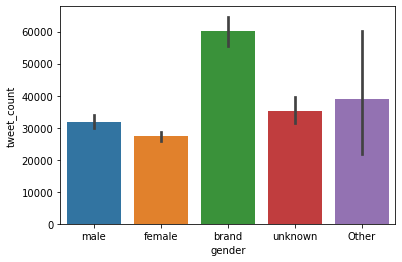

In [46]:
#6) Visualize the dataset, for the target variable
#barplot

#plotting bar plot between gender and tweet_count to see who tweets more often.
print("Bar graph for determinig no.of.tweets compared between different values of gender: ")

sns.barplot(x = "gender", y = "tweet_count", data = df_gclass)
plt.show()

Bar graph for determinig trusted judgments compared between different values of gender: 


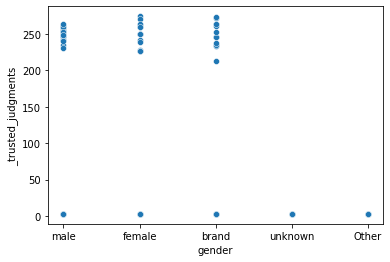

In [47]:
#6) Visualize the dataset, for the target variable
#Scatterplot

#plotting scatter plot between gender and tweet_count to see who tweets more often.

print("Bar graph for determinig trusted judgments compared between different values of gender: ")
sns.scatterplot(data = df_gclass, x = "gender", y = "_trusted_judgments")

plt.show()

In [48]:
#citations

#1)https://iopscience.iop.org/article/10.1088/1757-899X/546/5/052068
#2)https://seaborn.pydata.org/generated/seaborn.scatterplot.html
#3)https://data-flair.training/blogs/train-test-set-in-python-ml/
#4)https://towardsdatascience.com/gini-index-vs-information-entropy-7a7e4fed3fcb
#5)https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8